# Тема: Искусственный нейрон и однослойный перцептрон

Искусственный нейрон — это математическая модель биологического нейрона.

Он получает на вход несколько значений x1, x2, ..., xn,
умножает их на соответствующие веса w1, w2, ..., wn,
добавляет смещение (bias) и пропускает результат через функцию активации.

Формула работы нейрона:
y = f(w1*x1 + w2*x2 + b)

где:
  - w — веса,
  - b — смещение (bias),
  - f — функция активации (например, сигмоида, ReLU, tanh).

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов.

Каждый нейрон принимает на вход несколько признаков и выдает один выход.

Если нейронов несколько, то их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи линейной классификации — то есть разделять данные, которые можно отделить прямой или гиперплоскостью.

Однако он не может решить задачи, где классы разделяются нелинейно (например, логическую операцию XOR).

Правило обучения перцептрона:

w = w + η * (y_true - y_pred) * x
где:
  - η — скорость обучения,
  - y_true — истинное значение,
  - y_pred — предсказанное.

Таким образом, перцептрон корректирует веса, если предсказание неверное, постепенно улучшая свою способность различать классы.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def identity(z):
    return z


def step(z):
    return z >= 0


def th(z):
    return np.tanh(z)


def arctg(z):
    return np.arctan(z)


activations = {
    "сигмоида": sigmoid,
    "тождественная": identity,
    "ступенька": step,
    "tanh": th,
    "arctg": arctg
}


def neuron_output(X, w, b, act):
    return act(np.dot(X, w) + b)


In [28]:
SIZE = 100
SEED = 45

In [29]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0] * SIZE + [1] * SIZE)

w = np.random.randn(2)
b = 0.0

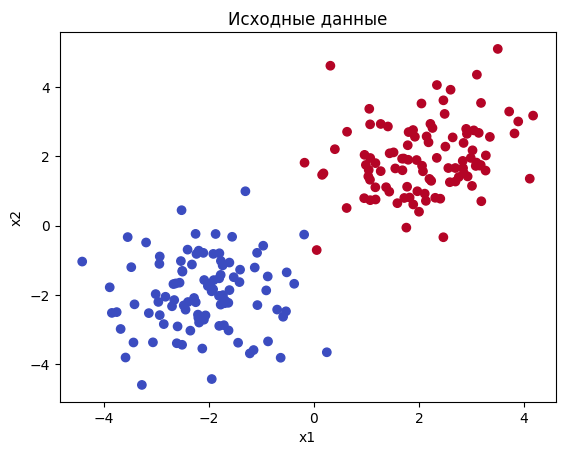

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [31]:
def plot_decision_boundary(w, b, f, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b, f)

    if f in (sigmoid, step):
        Z = (Z >= 0.5).astype(int)
    else:
        Z = (Z >= 0).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5], alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title(title)
    plt.show()


In [32]:
LEARNING_RATE = 0.1
EPOCHS = 10


Активация: сигмоида
Эпоха 1 точность 0.9950
Эпоха 2 точность 0.9950
Эпоха 3 точность 0.9950
Эпоха 4 точность 0.9900
Эпоха 5 точность 0.9950
Эпоха 6 точность 0.9950
Эпоха 7 точность 0.9900
Эпоха 8 точность 0.9950
Эпоха 9 точность 1.0000
Эпоха 10 точность 1.0000


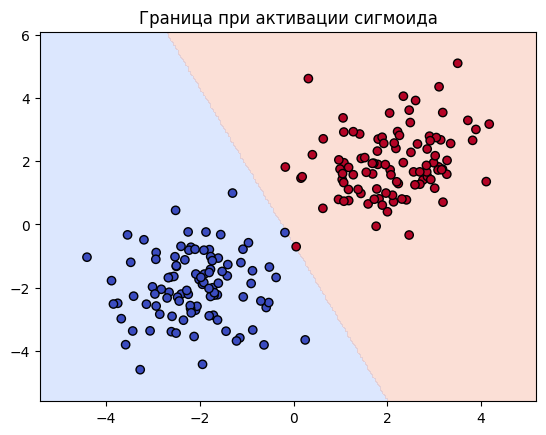


Активация: тождественная
Эпоха 1 точность 0.9950
Эпоха 2 точность 0.9950
Эпоха 3 точность 0.9950
Эпоха 4 точность 0.9900
Эпоха 5 точность 0.9950
Эпоха 6 точность 1.0000
Эпоха 7 точность 1.0000
Эпоха 8 точность 1.0000
Эпоха 9 точность 1.0000
Эпоха 10 точность 1.0000


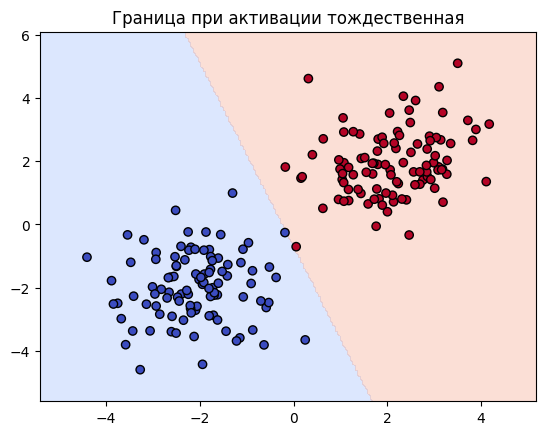


Активация: ступенька
Эпоха 1 точность 0.9950
Эпоха 2 точность 0.9950
Эпоха 3 точность 0.9900
Эпоха 4 точность 0.9950
Эпоха 5 точность 0.9900
Эпоха 6 точность 0.9950
Эпоха 7 точность 0.9950
Эпоха 8 точность 0.9950
Эпоха 9 точность 1.0000
Эпоха 10 точность 1.0000


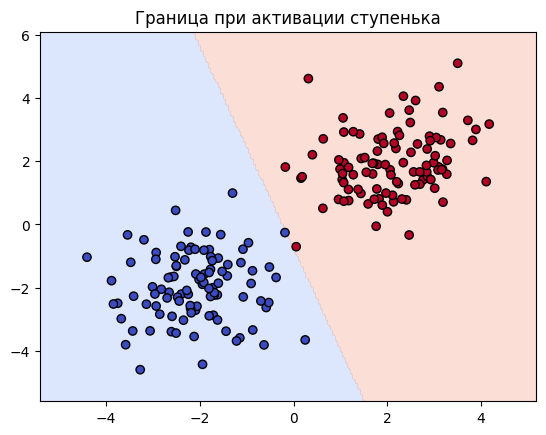


Активация: tanh
Эпоха 1 точность 0.9950
Эпоха 2 точность 0.9950
Эпоха 3 точность 0.9950
Эпоха 4 точность 0.9850
Эпоха 5 точность 0.9950
Эпоха 6 точность 0.9950
Эпоха 7 точность 0.9950
Эпоха 8 точность 0.9950
Эпоха 9 точность 1.0000
Эпоха 10 точность 1.0000


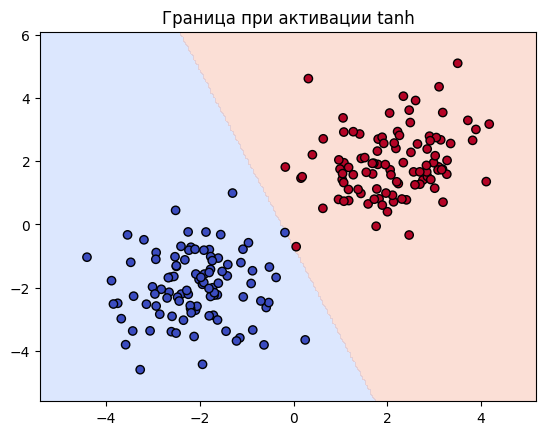


Активация: arctg
Эпоха 1 точность 0.9950
Эпоха 2 точность 0.9900
Эпоха 3 точность 0.9950
Эпоха 4 точность 0.9950
Эпоха 5 точность 0.9900
Эпоха 6 точность 0.9950
Эпоха 7 точность 0.9950
Эпоха 8 точность 0.9950
Эпоха 9 точность 0.9950
Эпоха 10 точность 0.9950


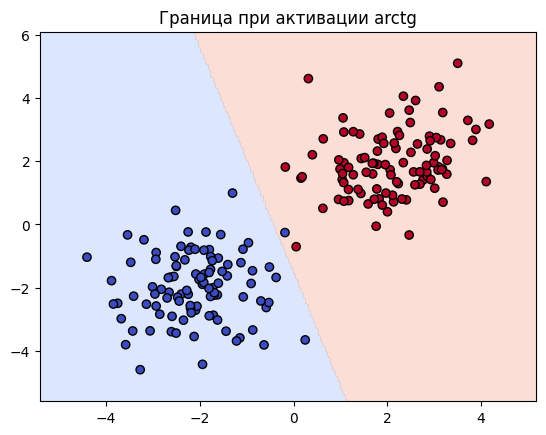

In [33]:
for name, act in activations.items():
    print(f'\nАктивация: {name}')

    w = np.random.randn(2)
    b = 0.0

    for epoch in range(EPOCHS):
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            pred = 1 if z >= 0 else 0
            error = y[i] - pred

            w += LEARNING_RATE * error * X[i]
            b += LEARNING_RATE * error

        preds = np.array([1 if np.dot(x, w) + b >= 0 else 0 for x in X])
        acc = (preds == y).mean()
        print(f'Эпоха {epoch + 1} точность {acc:.4f}')

    plot_decision_boundary(w, b, act, f'Граница при активации {name}')


1. Что делает функция активации в искусственном нейроне2. Чем отличается искусственный нейрон от однослойного перцептрона?
3. Какое правило используется для обучения перцептрона?
4. Почему однослойный перцептрон не может решить задачу XOR?
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?


1. Функция активации определяет насколько будет активирован нейрон в зависимости от входных данных. Искусственный нейрон это базовый элемент, а однослойный перцептрон это сеть нейронов
2. нейрон корректирует свои веса и смещение только если ошибся, w = η * (y_true - y_pred) * x где η это скорость обучения, y_true правильный ответ, y_pred предсказание, x вектор входных данных
3. Потому что XOR не линейноразделимая задача
4. ReLU будет быстрее просчитываться, но выход не ограничен сверху, поэтому пропадет интерпретируемость как вероятность